<a href="https://colab.research.google.com/github/ealeongomez/Deep-Learning/blob/master/MNIST_NOISE_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses


#**Load data**

In [2]:
train, test = tf.keras.datasets.mnist.load_data()
X_train, y_train = train

X_train = X_train/255
X_train.shape


11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
# Varianza del ruido
var = 0.1
X_trainN = X_train + np.sqrt(var)*np.random.randn(X_train.shape[0], X_train.shape[1], X_train.shape[2])

X_train, X_trainN, X_valid, X_validN, X_test, X_testN = X_train[0:40000], X_trainN[0:40000], X_train[40000:50000], X_trainN[40000:50000], X_trainN[50000:60000], X_trainN[50000:60000]

X_train.shape, X_trainN.shape, X_valid.shape, X_validN.shape, X_testN.shape, X_test.shape

((40000, 28, 28),
 (40000, 28, 28),
 (10000, 28, 28),
 (10000, 28, 28),
 (10000, 28, 28),
 (10000, 28, 28))

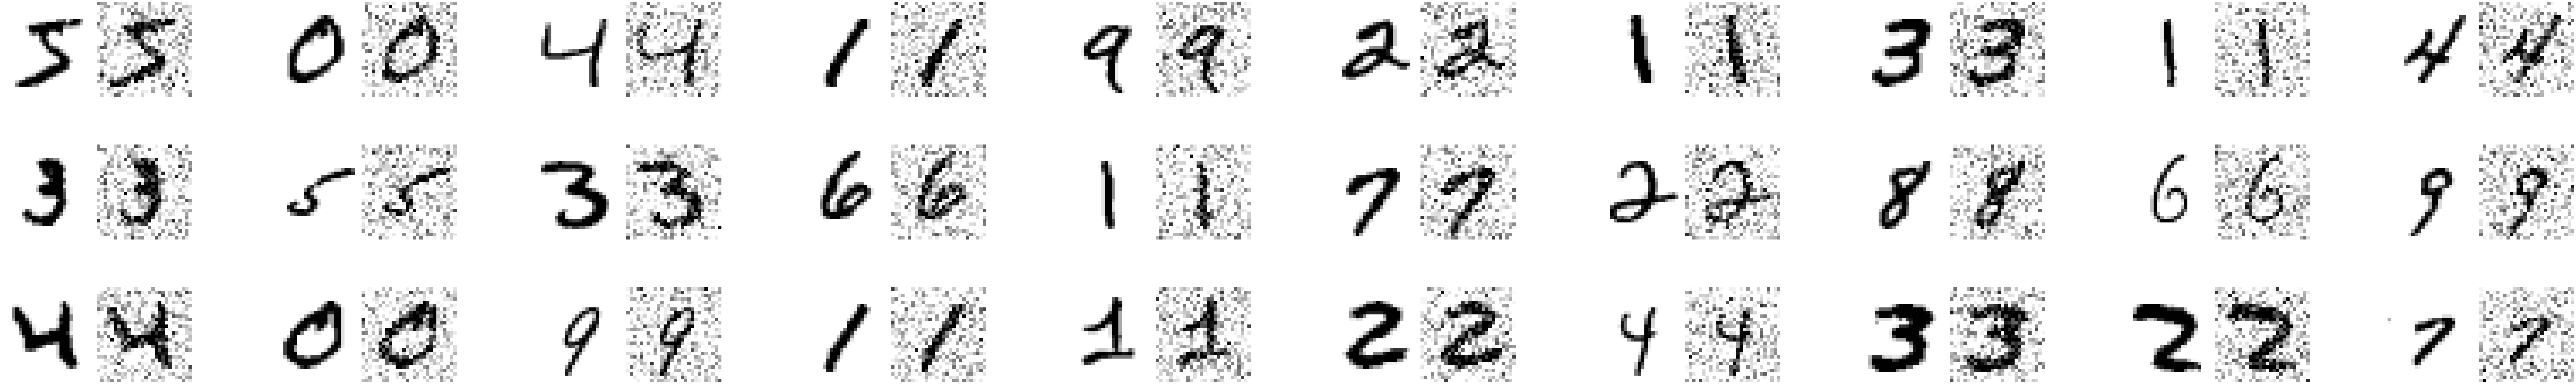

In [4]:
n_rows = 3
n_cols = 10
plt.figure(figsize=(n_cols * 20, n_rows * 10))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(np.c_[X_train[index], X_trainN[index]],cmap='binary',vmin=0,vmax=1)
        plt.axis('off')
        
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show() 

#**Deep Learning: Autoencoders**

In [5]:
dimension = 64                                         # Espacio latente de menor dimensión  

class Autoencoder(Model):                              # Creación de la clase 

  def __init__(self, encoding_dim):            

    # Autoencoder: mapeo a espacio de menor dimensión                 
    super(Autoencoder, self).__init__()
    self.dimension = dimension   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(dimension, activation='relu'),
    ])
  
    # Decoder: Mapeo a espacio original de entrada 
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(dimension) 

In [6]:
autoencoder.compile(optimizer='adam',
                    loss=losses.MeanSquaredError())

In [7]:
history = autoencoder.fit(X_trainN, X_train, 
                          epochs=10, 
                          shuffle=True,
                          validation_data=(X_valid, X_validN))

Epoch 1/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0336 - val_loss: 0.1155
Epoch 2/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0151 - val_loss: 0.1092
Epoch 3/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0119 - val_loss: 0.1072
Epoch 4/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0109 - val_loss: 0.1063
Epoch 5/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0105 - val_loss: 0.1059
Epoch 6/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0103 - val_loss: 0.1057
Epoch 7/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0102 - val_loss: 0.1057
Epoch 8/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0101 - val_loss: 0.1055
Epoch 9/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.0100 - val_loss: 0.1056
Epoch 10/10
1250/1250 [==============================] - 2s 2ms/step - loss: 0.010

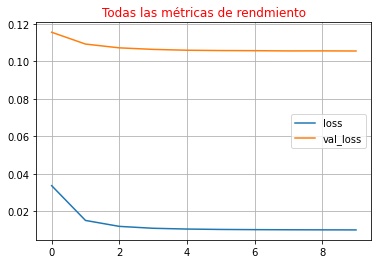

In [8]:
hpd = pd.DataFrame(history.history)

hpd.plot()
plt.title('Todas las métricas de rendmiento', c='r')
plt.grid(True)
plt.show()

In [9]:
encoded_imgs = autoencoder.encoder(X_testN).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

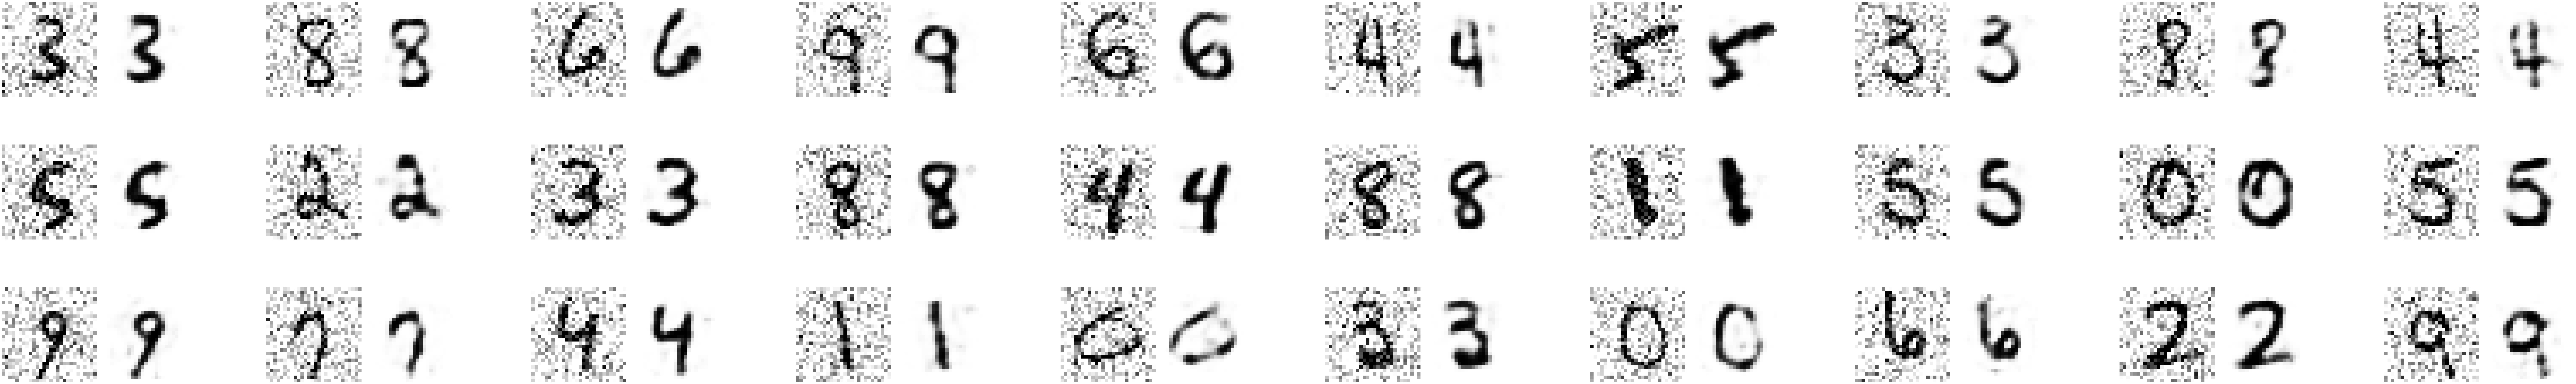

In [10]:
n_rows = 3
n_cols = 10
plt.figure(figsize=(n_cols * 20, n_rows * 10))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(np.c_[X_test[index], decoded_imgs[index]],cmap='binary',vmin=0,vmax=1)
        plt.axis('off')
        
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show() 